In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
from tensorflow import keras
from tensorflow.keras import layers

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical

In [91]:
gait = pd.read_csv("gaitFull.csv")

In [92]:
gait

,P1,P2,P3,P4,x1,y1,z1,x2,y2,z2,r,label
0,0,0,1,1,-0.29,-9.70,3.97,0.08,-9.31,0.27,161,0
1,0,0,1,1,0.05,-9.51,4.45,0.27,-9.05,-0.67,151,0
2,0,0,1,1,0.78,-9.48,6.54,1.96,-8.99,2.08,146,1
3,0,0,1,1,5.77,-6.85,3.06,-0.24,-8.95,6.86,144,1
4,0,0,1,1,0.45,-9.52,-0.36,0.39,-9.85,2.25,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1,1,0,0,-5.31,-10.97,-6.63,-1.89,-10.10,-3.29,288,5
2372,1,1,0,0,-0.86,-9.70,-1.71,-3.69,-9.92,-2.17,276,5
2373,1,1,0,0,-0.79,-10.07,-3.23,-1.73,-9.16,1.32,251,5
2374,1,1,0,0,0.31,-10.10,3.14,3.06,-8.72,-0.20,209,6


In [93]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [95]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [96]:
y_train = to_categorical(y_train)
test=y_test
y_test = to_categorical(y_test)

In [97]:
#Important parameters and training/Test size
prediction_time = 1 
testdatasize = X_test.shape[0]
unroll_length = 10
testdatacut = testdatasize + unroll_length  + 1


In [98]:
#def unroll(data,sequence_length=24):
 #   result = []
  #  for index in range(len(data) - sequence_length):
   #     result.append(data[index: index + sequence_length])
    #return np.asarray(result)

#Adapt the datasets for the sequence data shape
#X_train = unroll(X_train,unroll_length)
#X_test  = unroll(X_test,unroll_length)
#Y_train = y_train[-X_train.shape[0]:]
#y_test  = y_test[-X_test.shape[0]:]

In [99]:
X_train.shape

(1900, 11)

In [100]:
y_test.shape

(476, 8)

In [102]:
#Building the model
model = Sequential()

model.add(LSTM(200, input_shape=(50,11)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               169600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1608      
Total params: 211,408
Trainable params: 211,408
Non-trainable params: 0
_________________________________________________________________


In [104]:
def gen_train(data_array):
    seq_length=50
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
            lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

In [105]:
def gen_label(data_array):    
    seq_length=50
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append(data_array[stop])
    return np.array(y_label)

In [106]:
X_train=gen_train(X_train)
X_test=gen_train(X_test)

In [107]:
y_train=gen_label(y_train)
y_test=gen_label(y_test)

In [108]:
model.fit(X_train, y_train, nb_epoch=50, validation_split=0.1)

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1665 samples, validate on 185 samples
Epoch 1/50
1665/1665 [==============================] - 3s 2ms/step - loss: 2.2193 - accuracy: 0.1333 - val_loss: 2.0814 - val_accuracy: 0.1459
Epoch 2/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.1163 - accuracy: 0.1544 - val_loss: 2.0797 - val_accuracy: 0.1459
Epoch 3/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.1301 - accuracy: 0.1321 - val_loss: 2.0733 - val_accuracy: 0.1351
Epoch 4/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.1117 - accuracy: 0.1231 - val_loss: 2.0731 - val_accuracy: 0.1514
Epoch 5/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.0940 - accuracy: 0.1393 - val_loss: 2.0773 - val_accuracy: 0.1351
Epoch 6/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.0880 - accuracy: 0.1369 - val_loss: 2.0755 - val_accuracy: 0.1514
Epoch 7/50
1665/1665 [==============================] - 2s 1ms/step - loss: 2.0880 - accu

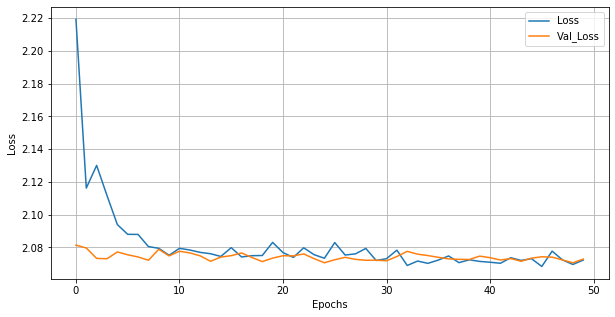

In [109]:
plt.figure(figsize = (10, 5))
plt.plot(model.history.history['loss'], label = 'Loss')
plt.plot(model.history.history['val_loss'], Label = 'Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

In [19]:
p = model.predict(X_test)

In [20]:
diff=[]
ratio=[]
for u in range(len(y_test)-1):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))


In [21]:
X_train.shape

(1890, 10, 11)

In [22]:
import tensorflow as tf
index = tf.argmax(p,axis=1)

In [23]:
z=np.array(index)

In [24]:
z.shape

(466,)

In [25]:
y_test.shape

(466, 8)

In [26]:
print(confusion_matrix(test, z))

[[52  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  1  0]
 [65  0  0  0  0  0  0  0]
 [54  0  1  0  0  0  3  0]
 [68  0  1  0  0  0  0  0]
 [48  0  0  0  0  0  0  0]
 [69  0  1  0  1  0  0  0]
 [54  0  0  0  0  0  0  0]]


In [27]:
print(classification_report(test, z)) 

              precision    recall  f1-score   support

           0       0.11      1.00      0.20        52
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        54

    accuracy                           0.11       466
   macro avg       0.01      0.12      0.03       466
weighted avg       0.01      0.11      0.02       466



/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

NameError: name 'd' is not defined

In [ ]:
gait = pd.read_csv("gaitFullModified2.csv")

In [ ]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_estimator_) 

In [ ]:
grid_predictions=grid.predict(X_test)

In [ ]:
print(classification_report(y_test, grid_predictions)) 

In [ ]:
print(confusion_matrix(y_test, grid_predictions))

In [ ]:
d=[[ 27 ,15  , 0  ,12],
 [ 14 ,142 ,  4,  26],
 [  7,  14,  38  , 9],
 [ 14 , 27,  12, 115]]

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
nodes= [3,8,6,7,2]
out=[]
for k in range(len(nodes)):
        out.append(nodes[-k])
print(out)

In [ ]:
num = 15
def increment(num):
    num = num + 2

increment(10)
print(num)